In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [4]:
data_dir = "../data/aruba/data.csv"
df_aruba = pd.read_csv(
    data_dir,
    delim_whitespace=True,
    names=[
        "date",
        "time",
        "sensor_type",
        "sensor_status",
        "meta",
        "meta_begin_end",
    ],
)

pattern_motion_sensor = r"[M]{1}[0-9]{3,}"
pattern_temperature_sensor = r"[T]{1}[0-9]{3,}"
pattern_door_closure_sensor = r"[D]{1}[0-9]{3,}"

# Create subsets for each sensor type
df_motion_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_motion_sensor)
]
df_temperature_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_temperature_sensor)
]
df_door_closure_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_door_closure_sensor)
]

display(df_temperature_sensor[:10])

/tmp/ipykernel_755/3434200096.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_aruba = pd.read_csv(


,date,time,sensor_type,sensor_status,meta,meta_begin_end
2,2010-11-04,00:15:08.984841,T002,21.5,NaN,NaN
3,2010-11-04,00:30:19.185547,T003,21,NaN,NaN
4,2010-11-04,00:30:19.385336,T004,21,NaN,NaN
5,2010-11-04,00:35:22.24587,T005,20.5,NaN,NaN
6,2010-11-04,00:40:25.428962,T005,21,NaN,NaN
7,2010-11-04,00:45:28.658171,T005,20.5,NaN,NaN
8,2010-11-04,01:05:42.269469,T001,20,NaN,NaN
9,2010-11-04,01:15:48.936777,T002,21,NaN,NaN
10,2010-11-04,01:30:59.100184,T003,20.5,NaN,NaN
11,2010-11-04,01:46:09.301846,T005,20,NaN,NaN


In [ ]:
# Convert 'time' column to datetime if it's not already
# df_temperature_sensor["time"] = pd.to_datetime(
#    df_temperature_sensor["time"], format="%H:%M:%S.%f"
# )  # .dt.time
# display(df_temperature_sensor[:10])

print(min(df_temperature_sensor["sensor_status"]))
print(max(df_temperature_sensor["sensor_status"]))

16
43


#### Daten einordnen / sortieren nach Skalenniveau
|Skalenniveau| Messbar   | Datentyp	| Lagemaße|
|------------|-----------|------------|------------|
|Nominal | Häufigkeit | Sensor Status (M = Motion ON/OFF), Sensor Status (D = Door OPEN/CLOSE)| Modus|
|Ordinal | Häufigkeit, Ordnung | Datum (date), Zeitstempel (time)| Modus, Median|
|Intervall |Häufigkeit, Ordnung, Abstand| Sensor Status (T = Temperature)| Modus, Median, Mittelwert|
|Verhältnis |Häufigkeit, Ordnung, Abstand, Nullpunkt| NaN | Modus, Median, Mittelwert|

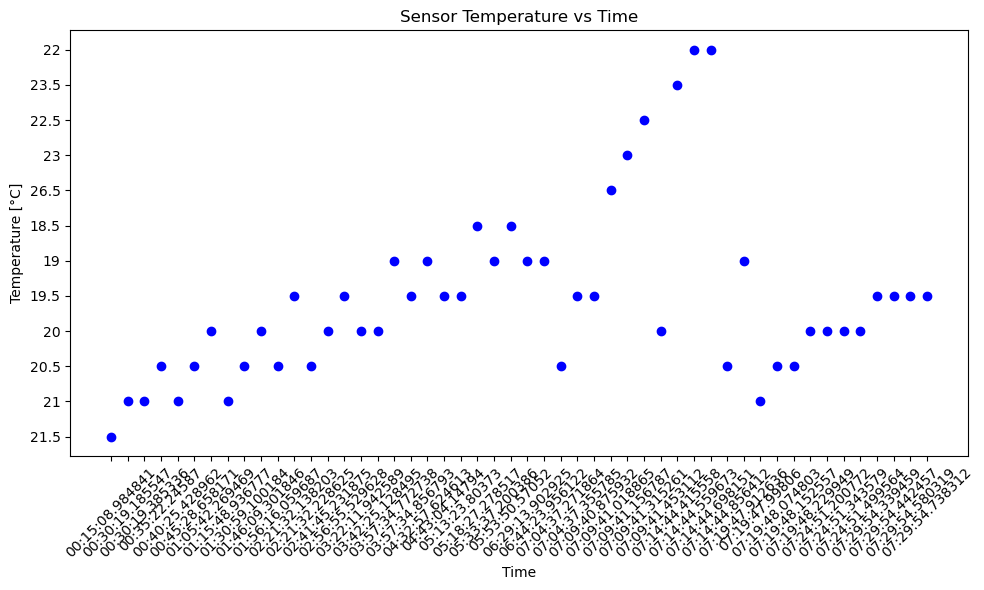

In [20]:
# Plot
data_range = 50
plt.figure(figsize=(10, 6))
plt.plot(
    df_temperature_sensor["time"][:data_range],
    df_temperature_sensor["sensor_status"][:data_range],
    "bo",
)

# Formatting the plot
plt.xlabel("Time")
plt.ylabel("Temperature [°C]")
plt.title("Sensor Temperature vs Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()